In [19]:
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses, optimizers

## Data Preparation

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [18]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

## Model Design

In [10]:
model = Sequential(
    [
        layers.Input(shape=x_train[0].shape),
        layers.Conv2D(6, (5, 5), activation='relu'),
        layers.MaxPool2D(),
        layers.Conv2D(16, (5, 5), activation='relu'),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [20]:
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam())

## Training

In [21]:
history = model.fit(x=x_train, y=y_train_categorical,
              batch_size = 64,
              epochs = 30,
              validation_data = [x_test, y_test_categorical]
              )

Epoch 1/30
782/782 [==============================] - 11s 4ms/step - loss: 2.5445 - val_loss: 1.8828
Epoch 2/30
782/782 [==============================] - 3s 4ms/step - loss: 1.7976 - val_loss: 1.7343
Epoch 3/30
782/782 [==============================] - 3s 4ms/step - loss: 1.6351 - val_loss: 1.6011
Epoch 4/30
782/782 [==============================] - 3s 4ms/step - loss: 1.5179 - val_loss: 1.5232
Epoch 5/30
782/782 [==============================] - 3s 4ms/step - loss: 1.4420 - val_loss: 1.4616
Epoch 6/30
782/782 [==============================] - 3s 4ms/step - loss: 1.3823 - val_loss: 1.4320
Epoch 7/30
782/782 [==============================] - 3s 4ms/step - loss: 1.3159 - val_loss: 1.4172
Epoch 8/30
782/782 [==============================] - 3s 4ms/step - loss: 1.2730 - val_loss: 1.3519
Epoch 9/30
782/782 [==============================] - 3s 4ms/step - loss: 1.2149 - val_loss: 1.4357
Epoch 10/30
782/782 [==============================] - 3s 4ms/step - loss: 1.1739 - val_loss: 1.404

## Evaluation

In [22]:
import matplotlib.pyplot as plt

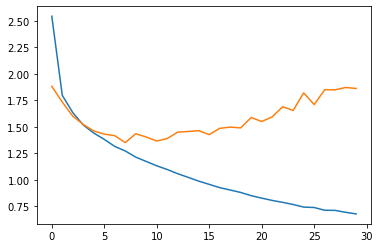

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [24]:
model.evaluate(x_test, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.8629


1.862884521484375

In [27]:
import numpy as np

In [32]:
pred = model.predict(np.expand_dims(x_test[56], axis=0))
pred_real = np.argmax(pred)
print(f'Real: {np.squeeze(y_test[56])}, Predicted: {pred_real}')

1/1 [==============================] - 0s 32ms/step
Real: 7, Predicted: 7


In [33]:
pred_list = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [34]:
pred_list.shape

(10000, 10)

In [36]:
model.save('model.h5')
model.save('model.keras')

In [37]:
from tensorflow.keras.models import load_model

In [38]:
model2 = load_model('model.h5')
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [39]:
model2.evaluate(x_test, y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 1.8629


1.862884521484375

In [40]:
from tensorflow.keras.utils import plot_model

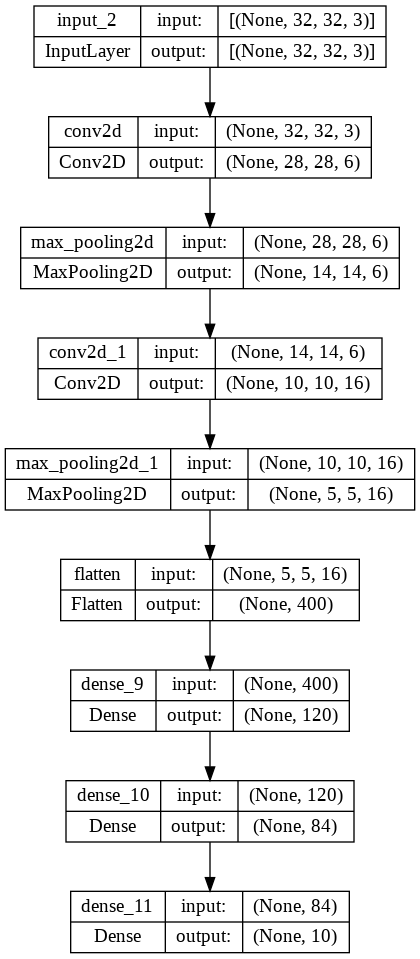

In [42]:
plot_model(model2, 'model.png', show_shapes=True)

In [43]:
model2.layers